In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [29]:
import zipfile
local_zip = '/content/drive/MyDrive/rockpaperscissor.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/content/drive/MyDrive')
zip_ref.close()

In [30]:
os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors')

['test', 'train', 'validation']

In [31]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/rock'))

840

In [32]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/scissors'))

840

In [33]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/paper'))

840

In [34]:
base_dir = '/content/drive/MyDrive/Rock-Paper-Scissors/train'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

os.mkdir(train_dir)
os.mkdir(validation_dir)

In [35]:
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [36]:
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.2)

train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.2)

train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.2)


In [37]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [38]:
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [39]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/train/rock'))

672

In [40]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/val/rock'))

168

In [41]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/train/scissors'))

672

In [42]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/val/scissors'))

168

In [43]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/train/paper'))

672

In [44]:
len(os.listdir('/content/drive/MyDrive/Rock-Paper-Scissors/train/val/paper'))

168

In [45]:

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest')


In [46]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 2016 images belonging to 3 classes.
Found 504 images belonging to 3 classes.


In [47]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (224,224,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [48]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])


In [57]:
history = model.fit(
    train_generator,
 steps_per_epoch = 20,
    epochs = 20,
    validation_data = validation_generator,
 validation_steps = 5,
    verbose =True
)

Epoch 1/20
20/20 [==============================] - 139s 7s/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0422 - val_accuracy: 0.9750
Epoch 2/20
20/20 [==============================] - 135s 7s/step - loss: 0.0491 - accuracy: 0.9906 - val_loss: 0.0324 - val_accuracy: 0.9812
Epoch 3/20
20/20 [==============================] - 124s 6s/step - loss: 0.0296 - accuracy: 0.9844 - val_loss: 0.0125 - val_accuracy: 0.9937
Epoch 4/20
20/20 [==============================] - 126s 6s/step - loss: 0.0156 - accuracy: 0.9937 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/20
20/20 [==============================] - 133s 7s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/20
20/20 [==============================] - 123s 6s/step - loss: 0.0117 - accuracy: 0.9969 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 7/20
20/20 [==============================] - 122s 6s/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 8/20
20

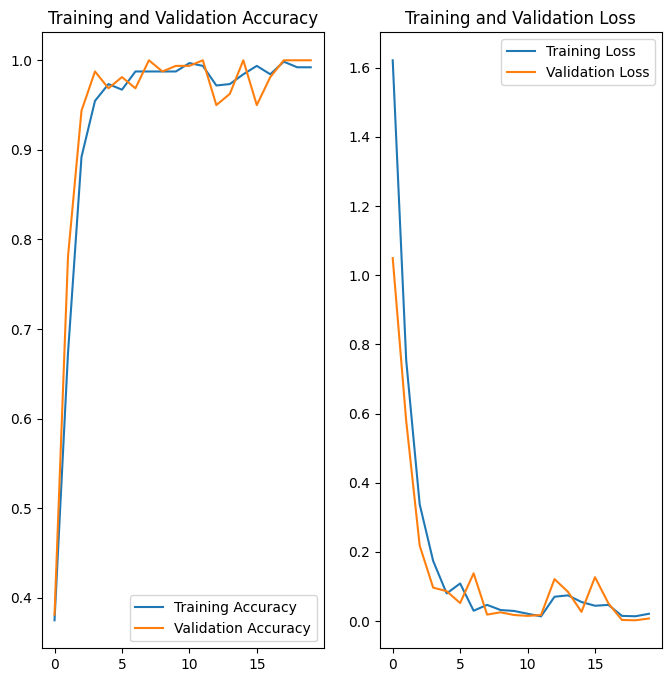

In [51]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
!pip install tensorflow-image


In [53]:
!pip install --upgrade tensorflow

Saving rock2.png to rock2.png
1/1 [==============================] - 0s 73ms/step
rock2.png
rock


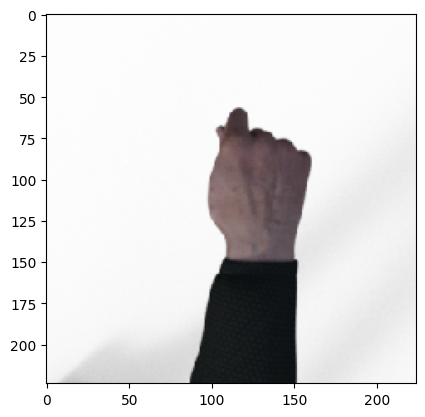

In [56]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size =(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')